In [2]:
# import the relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.cluster import KMeans

In [3]:
# load the data
data = pd.read_csv('F:\\schulich\python\\Udemy Data course\\required data files\\3.01. Country clusters.csv')
data


,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


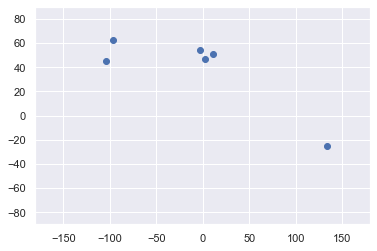

In [4]:
# lets plot the data based on their geographical location
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [5]:
# select the feature based on which you want to do clustering analysis
# we want to cluster the data based on their geographical location (its latitude and longtitude)
# we use iloc method to slice the data frame: DataFrame.iloc(row indices, column indices)
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
# clustering: usinf KMeans method: KMeans(number of clusters we want to produce)
# declare a variable which is an object that is used for clustering 
kmeans = KMeans(2)

In [7]:
# similar to regression we use fit method to put the data in our model
# this is all we need to write: this code will apply k-means clustering with 2 clusters to x
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters
# the below numbers show that the first three observations belong to cluster 0 while the last one belongs to cluster 1 

array([0, 0, 0, 0, 0, 1])

In [9]:
# let's create a data frame so we can see things more clearly
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


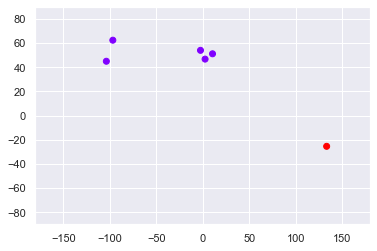

In [10]:
# plot the data and use matplot lib to show different clusters with different colors
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [11]:
# what if we want to have three clusters:
kmeans = KMeans(3)

kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters


array([0, 0, 1, 1, 1, 2])

In [12]:
# let's create a data frame so we can see things more clearly
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


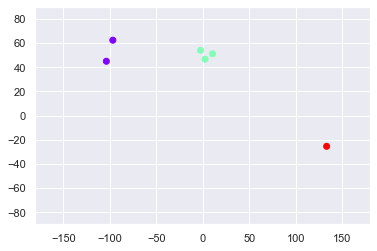

In [13]:
# plot the data and use matplot lib to show different clusters with different colors
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [14]:
# using language as a feature for clustering
# first we need to replace languages to numbers - quantifying cateforical data 
# note that this is not the optimal way to code them but it will work for now. 
# using map method
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French': 1, 'German': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [15]:
# select language as our only feature
x = data_mapped.iloc[:, 3:4]

In [16]:
# clustering: usinf KMeans method: KMeans(number of clusters we want to produce)
# declare a variable which is an object that is used for clustering 
kmeans = KMeans(3)
# similar to regression we use fit method to put the data in our model
# this is all we need to write: this code will apply k-means clustering with 2 clusters to x
kmeans.fit(x)
# clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters
# the below numbers show that the first three observations belong to cluster 0 while the last one belongs to cluster 1

array([1, 1, 0, 1, 2, 1])

In [17]:
# let's create a data frame so we can see things more clearly
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


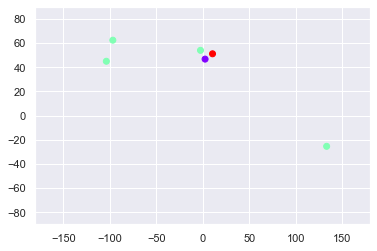

In [18]:
# plot the data and use matplot lib to show different clusters with different colors
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [19]:
# lets have langtitude, latitude, ann lanquage as out three features for clustering
# first we need to replace languages to numbers - quantifying cateforical data 
# note that this is not the optimal way to code them but it will work for now. 
# using map method
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French': 1, 'German': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [20]:
# select language as our three features
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [21]:
# clustering: usinf KMeans method: KMeans(number of clusters we want to produce)
# declare a variable which is an object that is used for clustering 
kmeans = KMeans(2)
# similar to regression we use fit method to put the data in our model
# this is all we need to write: this code will apply k-means clustering with 2 clusters to x
kmeans.fit(x)
# clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters
# the below numbers show that the first three observations belong to cluster 0 while the last one belongs to cluster 1

array([0, 0, 0, 0, 0, 1])

In [22]:
# let's create a data frame so we can see things more clearly
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


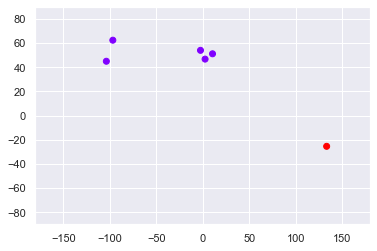

In [23]:
# plot the data and use matplot lib to show different clusters with different colors
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [24]:
# optimal K based on Elbow method
# according to Elbow rule, as distance is claculated based on sum of square within a cluster, we define a term for that
# Within-Cluster Sum of Square: WCSS, by increasing the number of clusters at a point there in now reduction in WCSS, 
# this point is our optimal K.
# python claculte this WCSS by inertia
kmeans.inertia_
print ('for k=2, WCSS=',kmeans.inertia_ )

for k=2, WCSS= 13208.95812


In [25]:
# the elbow method: lets claculate WCSS for each K=1,2,3,4,5,6,... and then plot the elbow
# we do that using a loop
# first create an empty list:
WCSS=[]

# we select 1,2,3,4,5,6 because we have 6 observations
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    WCSS_iteration = kmeans.inertia_
    WCSS.append(WCSS_iteration)

In [26]:
# as you see the sequence is decreasing with very big leaps in the first t2o steps
WCSS

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-Cluster Sum of Square')

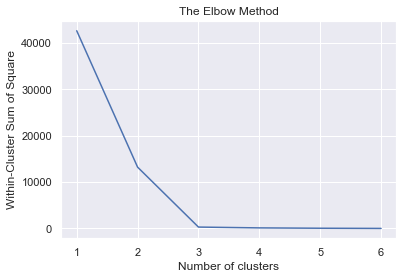

In [27]:
# declare a variable called numebr clusters
number_clusters = range(1,7)
plt.plot(number_clusters, WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')

In [28]:
# based on the above plot, we have 2 and 3 as our elbows, but as the difference between 2 and 3 is big, 2 is suboptimal and
# 3 is our optimal K.